[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/AM/blob/main/2_Regressão_Linear/2_reg_linear.ipynb)


# Aprendizado de máquina e decisões dirigidas por dados

**Professor: Diogo Ferreira de Lima Silva**

**TPP - UFF**

**Aula 2**

## Bibliotecas

In [46]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Regressão

Em tarefas de regressão, o programa de computador é solicitado a aprender uma função que gera um rótulo com valor numérico (ex: um número real) dado alguma entrada. 

Para resolver essa tarefa, o algoritmo de aprendizagem precisa gerar uma função:

$$\hat{y} = f:\mathbb{R}^n→\mathbb{R}$$ 

## Regressão Linear

Em um modelo de regressão linear, a função aprendida $f$ apresenta linearidade em termos dos parâmetros.

Exemplo:

$$f_{\vec{w},b}(\vec{x})=w_1x_1+w_2x_2+...+w_nx_n + b$$

$\vec{w}$ e $b$ são os parâmetros (coeficientes, pesos) que desejamos aprender


## Regressão Linear Simples

Para entender a intuição de modelos de regressão linear, iniciaremos com o caso mais simples, quando há apenas um atributo x. 

**Esse modelo é chamado de regressão linear simples.**

Exemplos:

- entender o relacionamento entre os preços de títulos financeiros e o valor do dólar;  
- prever o consumo de energia elétrica com base no tamanho da fábrica.

Vamos iniciar plotando um grafo de dispersão para uma função linear qualquer. Para isso, criaremos um vetor de observações aleatórias para um atributo x.

In [47]:
mu, sigma = 150, 50 # média e desvio padrão

# gerando 100 variáveis entre 0 e 2
X = np.random.normal(mu, sigma, size=(100,1)) 

print (X[:10])

[[ 96.51904149]
 [ 17.38089495]
 [173.3874932 ]
 [170.96527286]
 [147.40313102]
 [122.10983871]
 [ 28.75839487]
 [ 79.10217855]
 [194.94589385]
 [113.58914843]]


Associaremos um rótulo a cada entrada x com base em uma função linear acrescida de uma pequena aleatoriedade.

In [48]:
mu_2, sigma_2 = 0, 10

y = 25 + 2 * X + np.random.normal(mu_2, sigma_2, size=(100,1))

### Conjunto de Dados

In [49]:
import pandas as pd
pd.DataFrame(np.concatenate((X,y), axis=1), columns = ["Área", "Preço (1000's)"]).round(2)

,Área,Preço (1000's)
0,96.52,222.85
1,17.38,59.81
2,173.39,367.28
3,170.97,349.16
4,147.40,324.98
...,...,...
95,69.92,147.53
96,117.98,247.87
97,192.12,400.06
98,194.09,399.22


Plotando os dados

Text(0, 0.5, 'Preço em (1000 R$)')

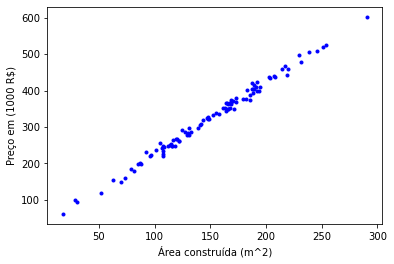

In [50]:
plt.plot(X, y, "b.")
plt.xlabel('Área construída (m^2)')
plt.ylabel('Preço em (1000 R$)')

### Interpretação Estatística

**Ideia central**: É impossível obter uma reta que passe por todos os pontos, porém podemos perceber um relacionamento linear.

Existe uma indicação de que os pontos estariam dispostos aleatoriamente em volta de uma reta. 

Assim, seria razoável assumir que a média da variável aleatória $y$ está relacionada à variável explanatória $x$ por um relacionamento linear

$$E(y│x)=μ_{y|x}=w_0+w_1 x$$

- $w_0$ é o intercepto da equação
- $w_1$ é o coeficiente angular. 


**Interpretação**: Embora a média de y seja uma função linear de $x$, um valor observado qualquer $y^{(i)}$ não cai necessariamente precisamente na reta. 

$$y^{(i)}=w_0+w_1x^{(i)} + \epsilon$$

Assim, precisamos estimar $w_0$ e $w_1$ de modo a obter o modelo menos custoso. 


### Erro Médio Quadrático

Fazemos isso minimizando a função custo associada ao erro médio quadrático.

$$min_{w,b}⁡ \ J= \frac{1}{2m} \sum_{i=1}^m [( wx^{(i)}+b) - y^{(i)}]^2$$

In [51]:
def custo_total (x, y, w, b):
    m = x.shape[0] 
    custo = 0
    for i in range(m):
        f_wb = w * x[i] + b
        custo = custo + (f_wb - y[i])**2 
    J = 1 / (2 * m) * custo
    return J

In [52]:
# Vamos calcular o custo de com w = 4 e b = 10

custo_total (X,y, w = 4, b = 10).round(2)

array([46049.97])

### Como encontrar as melhores estimativas de $w$ e $b$?

Sabemos que a nossa função custo é convexa em relação aos parâmetros!

**Estratégias Possíveis**:

1. Buscar a solução fechada (exata)

- A função pode ser minimizada com o sistema de derivadas parciais igualadas a zero

2. Gradiente descendente

### Solução Fechada

Podemos minimizar $J$, pelas condições de primeira ordem de otimização.

Escolheremos as estimativas de parâmetros que satisfaçam:

$$\frac{\partial J}{\partial w_0} = 0$$

$$\frac{\partial J}{\partial w_1} = 0$$


Como visto na sala de aula, a solução do sistema acima resulta nas fórmulas a seguir (presentes em livros de estatística):


$${\hat{w}} = \frac{\sum_{i=1}^{m}{y^{(i)}x^{(i)}}-\frac{\left(\sum_{i=1}^{m}y^{(i)}\right)\left(\sum_{i=1}^{m}x^{(i)}\right)}{m}}{\sum_{i=1}^{m} {x^{(i)}}^{2} -\frac{({\sum_{i=1}^{m}{x^{(i)})}}^2}{m}}$$


$${\hat{b}}=\bar{y} - {\hat{w}} \bar{x}$$


Assim, obtém-se o modelo regressor $$\hat{y}={\hat{w}}x + \hat{b}$$ estima o valor médio do modelo de regressão. 

Cada observação satisfaz a relação $y^{(i)}={\hat{b}}+{\hat{w}}x+\epsilon$, onde $\epsilon=y^{(i)}-{\hat{y}}^{(i)}$ é chamado de desvio ou resíduo.

In [53]:
m=X.shape[0]

w_hat = (y.T @ X - (np.sum(y) * np.sum(X)) / m) / (X.T @ X - np.sum(X)**2/m)

b_hat = np.mean(y) - w_hat * np.mean(X)

print(w_hat)
print(b_hat)

[[1.98713082]]
[[26.91049459]]


In [54]:
#Calculando o custo nas estimativas!

custo_total (X,y, w_hat, b_hat).round(2)

array([[41.79]])

### Usando a biblioteca sklearn

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.98713082]]), array([26.91049459]))

Perceba que obtivemos os mesmos valores!

### Gerando exemplos de teste

Vamos usar a mesma metodologia acima para gerar valores para teste

In [56]:
mu, sigma = 150, 50 # média e desvio padrão
mu_2, sigma_2 = 0, 10
X_teste = np.random.normal(mu, sigma, size=(30,1))
y_teste = 25 + 2 * X_teste + np.random.normal(mu_2, sigma_2, size=(30,1))

Usando os parâmetros estimados acima em lin_reg, podemos prever os preços 

In [57]:
lin_reg.predict(X_teste)

array([[249.12221229],
       [272.1488496 ],
       [453.19818507],
       [267.12134792],
       [360.05902569],
       [416.82705738],
       [389.99967993],
       [210.77357747],
       [344.20284552],
       [269.55351336],
       [328.81269877],
       [255.76038091],
       [174.46162475],
       [410.60256345],
       [139.17311957],
       [293.65388028],
       [350.70552915],
       [287.32478041],
       [393.62617569],
       [363.63775898],
       [196.88660909],
       [208.24395459],
       [523.82326574],
       [327.63487651],
       [368.6109103 ],
       [212.8689476 ],
       [224.29998804],
       [272.19032056],
       [333.92319653],
       [271.06120703]])

**O custo pode ser calculado com nossa função custo total**

In [58]:
# Usando os parâmetros do sklearn 
print (custo_total (X_teste, y_teste, lin_reg.coef_, lin_reg.intercept_))

# Usando os parâmetros da nossa fórmula da função fechada
print (custo_total (X_teste, y_teste, w_hat, b_hat))

[[58.70683412]]
[[58.70683412]]


Também podemos calcular o custo com o sklearn. 

Nesse caso, o valor quadrático é multiplicado por $\frac{1}{m}$ ao invés de $\frac{1}{2m}$ 

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mean_squared_error(lin_reg.predict(X_teste), y_teste)

117.41366824733227

In [61]:
# Dividindo o valor acima por 2, chegamos  aos nossos valores da função custo_total

mean_squared_error(lin_reg.predict(X_teste), y_teste)/2

58.706834123666134

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################


## Regressão linear com vários atributos

No caso genérico, uma observação, então, é dada por um vetor de $d$ atributos $\mathbf{x}_i \in \mathbb{R}^d$. 

Considerando o relacionamento entre as variáveis de entrada $\mathbf{x}_i \in \mathbb{R}^d$ e o valor de saída $y\in\mathbb{R}$ linear, temos uma **regressão linear**:

$$y=\mathbf{w}^{T}\mathbf{x} + \epsilon$$


Onde $\mathbf{w}^{T}=[w_1,\ldots,\ w_n]$ é um vetor de parâmetros, no qual $w_j$ é o coeficiente que multiplica o atributo $x_j$ antes de somar as contribuições de todos os atributos. 

O coeficiente $w_j$ indica como a variável dependente $y$ muda em média quando $x_j$ é adicionado em uma unidade e as demais variáveis independentes permanecem constantes. 

Esses parâmetros são valores que controlam o comportamento do sistema, muitas vezes chamados de pesos ou coeficientes da regressão.

### Adicionando o intercepto

Frequentemente, o termo regressão linear é usado para um modelo um pouco mais sofisticado, com um parâmetro adicional: o intercepto $b$. 


Teríamos: $y=\mathbf{w}^T\mathbf{x}+b$. 

No entanto, podemos continuar usando o modelo anterior (apenas com pesos). Para isso, inserimos um valor extra para cada observação $\vec{x}^{(i)}$, sempre igual a $x_{0}=1$. 

Dessa forma, o peso correspondente à entrada extra ($w_0$) desempenha o papel do intercepto.


### Interpretação

O modelo com $n$ atributos descreve um hiperplano no espaço n-dimensional das variáveis dos coeficientes.

### Solução Exata


$$\nabla_\mathbf{w}\left|\left|\mathbf{y}-\hat{\mathbf{y}}\right|\right|_2^2 = 0\rightarrow\nabla_\mathbf{w}\left|\left|\mathbf{y}-\mathbf{X}\hat{\mathbf{w}}\right|\right|_2^2=0$$


$$
\nabla_\mathbf{w}\left(\mathbf{y}-\mathbf{X}\hat{\mathbf{w}}\right)^T\left(\mathbf{y}-\mathbf{X}\hat{\mathbf{w}}\right)=0
$$

$$
\nabla_\mathbf{w}\left(\mathbf{y}^\mathbf{T}\mathbf{y}-2{\hat{\mathbf{w}}}^T\mathbf{X}^\mathbf{T}\mathbf{y}+{\hat{\mathbf{w}}}^T\mathbf{X}^\mathbf{T}\mathbf{X}\hat{\mathbf{w}}\right)=0
$$

$$
-2\mathbf{X}^\mathbf{T}\mathbf{y}+2\mathbf{X}^\mathbf{T}\mathbf{X}\hat{\mathbf{w}}=0
$$


$$
2\mathbf{X}^\mathbf{T}\mathbf{X}\hat{\mathbf{w}}=2\mathbf{X}^\mathbf{T}\mathbf{y}
$$


$$
\mathbf{X}^\mathbf{T}\mathbf{X}\hat{\mathbf{w}}=\mathbf{X}^\mathbf{T}\mathbf{y}
$$

$$
\hat{\mathbf{w}}=\left(\mathbf{X}^\mathbf{T}\mathbf{X}\right)^{-1}\mathbf{X}^\mathbf{T}\mathbf{y}
$$


**Esse resultado é conhecido como Equação Normal**

Relembrando nossa matriz de atributos que contém apenas uma coluna (área construída). 

In [62]:
X[:10]

array([[ 96.51904149],
       [ 17.38089495],
       [173.3874932 ],
       [170.96527286],
       [147.40313102],
       [122.10983871],
       [ 28.75839487],
       [ 79.10217855],
       [194.94589385],
       [113.58914843]])

Vamos adicionar o valor 1 na primeira coluna da matriz X

In [63]:
X_novo = np.concatenate([np.ones(shape=(X.shape)), X], axis=1)

X_novo[:10]


array([[  1.        ,  96.51904149],
       [  1.        ,  17.38089495],
       [  1.        , 173.3874932 ],
       [  1.        , 170.96527286],
       [  1.        , 147.40313102],
       [  1.        , 122.10983871],
       [  1.        ,  28.75839487],
       [  1.        ,  79.10217855],
       [  1.        , 194.94589385],
       [  1.        , 113.58914843]])

**A equação normal pode ser aplicada com uma única linha de código!!**

Perceba que chegaremos aos mesmos parâmetros aprendidos com a regressão linear simples acima

In [67]:
#Equação normal em uma linha de código:

w_hat2 = np.linalg.inv(X_novo.T.dot(X_novo)).dot(X_novo.T).dot(y)

print(w_hat2)

[[26.91049459]
 [ 1.98713082]]


In [69]:
print (f"Regressão Linear Simples:  valor de b é {b_hat},  valor de w é {w_hat}")

print (f"Equação Normal: valor de w_0:{w_hat2[0]}, valor de w: {w_hat2[1]}")

Regressão Linear Simples:  valor de b é [[26.91049459]],  valor de w é [[1.98713082]]
Equação Normal: valor de w_0:[26.91049459], valor de w: [1.98713082]
